<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Word-Embeddings-zu-Entscheidungsgründen" data-toc-modified-id="Word-Embeddings-zu-Entscheidungsgründen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Word Embeddings zu Entscheidungsgründen</a></span><ul class="toc-item"><li><span><a href="#Datenvorbereitung" data-toc-modified-id="Datenvorbereitung-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Datenvorbereitung</a></span><ul class="toc-item"><li><span><a href="#Datenimport" data-toc-modified-id="Datenimport-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Datenimport</a></span></li><li><span><a href="#Datenaufbereitung" data-toc-modified-id="Datenaufbereitung-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Datenaufbereitung</a></span></li></ul></li><li><span><a href="#Training-der-Word-Embeddings" data-toc-modified-id="Training-der-Word-Embeddings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Training der Word Embeddings</a></span></li><li><span><a href="#Similarity-Queries" data-toc-modified-id="Similarity-Queries-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Similarity-Queries</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Visualisierung</a></span></li><li><span><a href="#Fazit" data-toc-modified-id="Fazit-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Fazit</a></span></li></ul></li><li><span><a href="#Word-Embeddings-zu-Verbesserungsvorschlägen" data-toc-modified-id="Word-Embeddings-zu-Verbesserungsvorschlägen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word Embeddings zu Verbesserungsvorschlägen</a></span><ul class="toc-item"><li><span><a href="#Datenvorbereitung" data-toc-modified-id="Datenvorbereitung-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Datenvorbereitung</a></span><ul class="toc-item"><li><span><a href="#Datenimport" data-toc-modified-id="Datenimport-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Datenimport</a></span></li><li><span><a href="#Datenaufbereitung" data-toc-modified-id="Datenaufbereitung-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Datenaufbereitung</a></span></li></ul></li><li><span><a href="#Training-der-Word-Embeddings" data-toc-modified-id="Training-der-Word-Embeddings-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training der Word Embeddings</a></span></li><li><span><a href="#Similarity-Queries" data-toc-modified-id="Similarity-Queries-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Similarity-Queries</a></span></li><li><span><a href="#Visualisierung" data-toc-modified-id="Visualisierung-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualisierung</a></span></li><li><span><a href="#Fazit" data-toc-modified-id="Fazit-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Fazit</a></span></li></ul></li></ul></div>

In [1]:
%%capture
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

%precision 4

In [2]:
# for pretty printing
import pprint as pp

# IPython (Jupyter) setting: 
# Print out every value instead of just "last_expr" (default)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Warnungen unterdrücken
import warnings;
warnings.filterwarnings('ignore');

# Word Embeddings zu Entscheidungsgründen

Um die Entscheidungsgründe nach dem Clustering genauer zu identifizieren werden nun Word Embeddings auf den geschriebenen Texten gebildet.

## Datenvorbereitung

### Datenimport

In [3]:
import sqlite3
import pandas as pd
import os.path

dbPath = "database/bachelor_umfrage.db"

def get_embeddings_data(table_name="word_embeddings"):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT * FROM " + table_name
        sql += " WHERE Gründe IS NOT NULL"
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

reason_df = get_embeddings_data(table_name="word_embeddings")
reason_df.sample(2)

,AntwortID,Geschlecht,Studiengang,MINTFach,Qualifikation,GeborenAusland,ElternAusland,GeborenDeutschland,MINTStudiumEltern,StudiumEltern,MINTStudiumGeschwister,StudiumGeschwister,Studienpionier,MINTBerufEltern,MINTBerufGeschwister,...,Biologie,EntscheidungZeitpunkt,Fachinteresse,Berufsaussichten,Gehalt,AnsehenGesellschaft,FamiliaereGründe,Partner,Kinder,Karriere,MINTGründe,NichtMINTGründe,Verbesserungsvorschläge,Eigenschaften,Gründe
249,62589267,Weiblich,Soziale Arbeit,nein,allgemeine Hochschulreife,None,None,1,1,None,None,None,None,1,None,...,1,"Als Zweites Studium, nach mehrjähriger Berufserfahrung in einem anderen Bereich und Familienzeit.",4,4,2,1,4,4,4,2,None,Für ein MINT Fach fehlt mir Talent.,Leider nicht.,"Weiblich, Soziale Arbeit, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat MINT-Fach studiert, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 4, Beliebtheit Physik: 1, Beliebtheit Informatik: 1, Beliebtheit Chemie: 1, Beliebtheit Biologie: 1, Fachinteresse: 4, Berufsaussichten: 4, Gehalt: 2, Gesellschaftliches Ansehen: 1, Partner: 4, Kinder: 4, Karriere: 2",Für ein MINT Fach fehlt mir Talent.
337,62609234,Männlich,Informatik,ja,allgemeine Hochschulreife,None,None,1,1,None,None,None,None,1,None,...,3,wärend den Abiprüfungen,3,3,2,2,2,2,2,3,"ich habe mich schon immer für Naturwissenschaften interessiert. Somit war die entscheidung zu einem MINT-Fach leicht.Letztendlich habe ich mich zwischen Physik und Informatik entschieden, wobei ich wegen der besseren Berufsaussichten Informatik gewählt habe.",None,None,"Männlich, Informatik, allgemeine Hochschulreife, in Deutschland geboren, Elternteil hat MINT-Fach studiert, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 5, Beliebtheit Physik: 5, Beliebtheit Informatik: 5, Beliebtheit Chemie: 5, Beliebtheit Biologie: 3, Fachinteresse: 3, Berufsaussichten: 3, Gehalt: 2, Gesellschaftliches Ansehen: 2, Partner: 2, Kinder: 2, Karriere: 3","ich habe mich schon immer für Naturwissenschaften interessiert. Somit war die entscheidung zu einem MINT-Fach leicht.Letztendlich habe ich mich zwischen Physik und Informatik entschieden, wobei ich wegen der besseren Berufsaussichten Informatik gewählt habe."


### Datenaufbereitung

Es erfolgt die Datenaufbereitung mit Lemmatisierung und POS-Tagging (bezogen auf Substantive). Die Ergebnisse werden jeweils als Spalte dem Dataframe hinzugefügt.

In [4]:
import spacy
# progress bar
from tqdm import tqdm_notebook as tqdm

nlp = spacy.load('de')

def nlp_process(df, col):    
    for i, row in df.iterrows():
        
        if(row[col] and len(str(row[col])) < 1000000):
            spacy_doc = nlp(str(row[col]))
            tokens = []
            lemmas = []
            nouns = []

            for token in spacy_doc:
                if token.pos_ in ('NOUN', 'PROPN'):
                    nouns.append(token.lemma_)
                if token.pos_ not in ('PUNCT'):
                    lemmas.append(token.lemma_)
                    tokens.append(token.text)

            df.at[i, "tokens"] = " ".join(tokens)                
            df.at[i, "lemmas"] = " ".join(lemmas)                
            df.at[i, "nouns"] = " ".join(nouns)
            df.at[i, "no_tokens"] = len(lemmas)

In [5]:
nlp_process(reason_df, 'Gründe')

In [6]:
reason_df[['Gründe', 'lemmas', 'nouns']].sample(2)

,Gründe,lemmas,nouns
95,"vorherige Ausbildung zur Speditionskauffrau hat Interesse an Logistik und Lagertechnik geweckt, wollte aber nicht mein Leben lang im Schichtdienst arbeiten --&gt; Studium Verkehrsingenieur (Dipl.-Ing.(FH)) , nach Abschluss bereits 5 Jahre im Berufsleben, nun Master als Weiterbildung",vorherig Ausbildung zur Speditionskauffrau haben Interesse an Logistik und Lagertechnik wecken wollen aber nicht meinen Leben langen im Schichtdienst arbeiten --&gt Studium Verkehrsingenieur Dipl.-Ing.(FH nach Abschluss bereits 5 Jahr im Berufsleben nun Master als Weiterbildung,Ausbildung Speditionskauffrau Interesse Logistik Lagertechnik Leben Schichtdienst --&gt Studium Verkehrsingenieur Dipl.-Ing.(FH Abschluss Jahr Berufsleben Master Weiterbildung
335,"Die Existenz objektiver, indiskutabler Tatsachen (Lösung einer Gleichung, Eigenschaften eines Stoffes, Wirkungsprinzip eines physikalischen Vorgangs, Determinismus eines Algorithmuses) sind für mich wichtig, um ein Fachgebiet ernstzunehmen. Z. B. Gesetze, die mir missfallen, könnte ich schwer verfechten., , Des Weiteren begeistert es mich, zu verstehen, warum Dinge naturgesetz- und logikbedingt gut funktionieren.",der Existenz objektiv indiskutabel Tatsache Lösung einer Gleichung Eigenschaft ein Stoff Wirkungsprinzip ein physikalisch Vorgang Determinismus ein Algorithmuses sein für sich wichtig um einen Fachgebiet ernstzunehmen Z. B. Gesetz der sich missfallen können ich schwer verfechten der Weitere begeistern ich sich zu verstehen warum dingen naturgesetz- und logikbedingt gut funktionieren,Existenz Tatsache Lösung Gleichung Eigenschaft Stoff Wirkungsprinzip Vorgang Determinismus Algorithmuses Fachgebiet B. Gesetz Weitere dingen


## Training der Word Embeddings

Verewendung der Word2Vec Implementierung in Gensim um das Modell zu Trainieren.

In [7]:
import gensim

# defaults
# window: windows size
# sg=0: to use skipgram set sg=1
# hs=0: use hierarchical softmax for faster training of large datasets
# negative=5: number of negative samples
# min_count=2: minimal word count
# sample=0.001: downsampling of frequent words
# iter=5: number of epochs
model = gensim.models.Word2Vec(reason_df['lemmas'].str.split(), size=50, window=5, sg=1, negative=5, 
                               min_count=2, workers=4, iter=25)

Speichern des Modells

In [8]:
model.save('word2vec_reason_model.bin')

Laden des Modells

In [9]:
#model = gensim.models.Word2Vec.load('word2vec_reason_model.bin')

## Similarity-Queries

Im folgenden werden zunächst die Wörter betrachtet, welche beim Clustering besonders häufig vorkamen. Dabei wird versucht durch die Word Embeddings eine genauere Vorstellung der Entscheidungsgründe zu bekommen. Die Wörter waren folgende:
- Interesse
- Schulen
- Fach
- Berufsaussichten
- Mathe (& Chemie & Physik)
- Erwägung
- Ausbildung

In [10]:
model.wv.most_similar('Interesse', topn=20)

[('Allgemeines', 0.9303),
 ('an', 0.9287),
 ('Naturwissenschaften', 0.9152),
 ('seit', 0.9096),
 ('Erfahrung', 0.9075),
 ('Fähigkeit', 0.9069),
 ('groß', 0.9062),
 ('Realschule', 0.8928),
 ('vorallem', 0.8846),
 ('Persönliches', 0.8841),
 ('Jugend', 0.8832),
 ('Schon', 0.8825),
 ('wecken', 0.8820),
 ('Technik', 0.8781),
 ('Meine', 0.8743),
 ('Großes', 0.8737),
 ('sowie', 0.8735),
 ('durch', 0.8709),
 ('Fachliches', 0.8704),
 ('Generelles', 0.8698)]

In [11]:
model.wv.most_similar('schulen', topn=20)

[('Naturwissenschaftlichen', 0.9341),
 ('MINT-Fächern', 0.9087),
 ('sprechen', 0.9084),
 ('besonders', 0.8981),
 ('Leistung', 0.8936),
 ('schlecht', 0.8907),
 ('Note', 0.8860),
 ('Lehrer', 0.8850),
 ('jeweilig', 0.8844),
 ('außer', 0.8820),
 ('zweigen', 0.8806),
 ('In', 0.8759),
 ('Unterricht', 0.8709),
 ('nein', 0.8687),
 ('naturwissenschaftlichen', 0.8662),
 ('ziemlich', 0.8649),
 ('Problem', 0.8580),
 ('fächern', 0.8578),
 ('gelegen', 0.8547),
 ('FOS', 0.8517)]

In [12]:
model.wv.most_similar('Fach', topn=20)

[('naturwissenschaftlichen', 0.8589),
 ('jeweilig', 0.8479),
 ('vorhanden', 0.8319),
 ('Note', 0.8213),
 ('besonders', 0.8134),
 ('Naturwissenschaftlichen', 0.8132),
 ('Unterricht', 0.8089),
 ('fächern', 0.8071),
 ('MINT-Fächern', 0.8046),
 ('bei', 0.8002),
 ('Leistung', 0.7897),
 ('zweigen', 0.7806),
 ('Musik', 0.7786),
 ('Frage', 0.7762),
 ('bereits', 0.7762),
 ('FOS', 0.7749),
 ('schulen', 0.7735),
 ('Fachliches', 0.7671),
 ('auch', 0.7657),
 ('kommen', 0.7652)]

In [13]:
model.wv.most_similar('Berufsaussichten', topn=20)

[('absolvieren', 0.9225),
 ('dadurch', 0.9196),
 ('&', 0.9133),
 ('amp', 0.9102),
 ('teilen', 0.9021),
 ('relativ', 0.8982),
 ('Erfahrung', 0.8890),
 ('Praktikum', 0.8883),
 ('gewiß', 0.8881),
 ('Gegensatz', 0.8854),
 ('Realschule', 0.8850),
 ('gering', 0.8838),
 ('zweigen', 0.8832),
 ('MINT-Bereich', 0.8826),
 ('FOS', 0.8823),
 ('Zukunftsaussichten', 0.8814),
 ('Technisches', 0.8802),
 ('Freundeskreis', 0.8776),
 ('Generelles', 0.8766),
 ('schulisch', 0.8756)]

In [14]:
model.wv.most_similar('Mathe', topn=20)

[('schlecht', 0.8984),
 ('Leistung', 0.8813),
 ('Mathematik', 0.8783),
 ('Note', 0.8604),
 ('Physik', 0.8574),
 ('Naturwissenschaftlichen', 0.8447),
 ('schulen', 0.8386),
 ('Schon', 0.8372),
 ('sowie', 0.8360),
 ('Lehrer', 0.8339),
 ('ziemlich', 0.8322),
 ('Lernen', 0.8318),
 ('zweigen', 0.8251),
 ('vorallem', 0.8218),
 ('Bio', 0.8212),
 ('Problem', 0.8211),
 ('sprechen', 0.8205),
 ('jeweilig', 0.8154),
 ('stärken', 0.8134),
 ('Weil', 0.8129)]

In [15]:
model.wv.most_similar('Erwägung', topn=20)

[('Betracht', 0.9218),
 ('ziehen', 0.9212),
 ('nie', 0.9199),
 ('einmal', 0.9019),
 ('ja', 0.9017),
 ('bewusst', 0.8763),
 ('hab', 0.8649),
 ('Lehramt', 0.8613),
 ('Nicht', 0.8569),
 ('kurz', 0.8535),
 ('obwohl', 0.8517),
 ('Mint-Fach', 0.8480),
 ('Maschinenbau', 0.8414),
 ('gar', 0.8386),
 ('dagegen', 0.8361),
 ('Einerseits', 0.8334),
 ('oben', 0.8297),
 ('aber', 0.8279),
 ('ob', 0.8270),
 ('durchaus', 0.8228)]

In [16]:
model.wv.most_similar('Ausbildung', topn=20)

[('enden', 0.8208),
 ('einen', 0.8195),
 ('abbrechen', 0.8186),
 ('vor', 0.8107),
 ('beid', 0.8102),
 ('zum', 0.8095),
 ('Fachinformatiker', 0.8043),
 ('wegen', 0.8032),
 ('Werkstoffkunde', 0.8018),
 ('maßgeblich', 0.7993),
 ('Medieninformatik', 0.7969),
 ('absolvieren', 0.7969),
 ('hierbei', 0.7959),
 ('schulisch', 0.7953),
 ('Wahl', 0.7920),
 ('wecken', 0.7907),
 ('ab', 0.7809),
 ('Studieren', 0.7806),
 ('Eltern', 0.7717),
 ('stehen', 0.7712)]

## Visualisierung

Um die Word Embeddings grafisch darzustellen werden diese nun mit PCA und tSNE visualisiert.

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

def dimred_plot(model, words, n_sim = 1, algo = 'tsne'):
    "Creates and TSNE model and plots it"
    wv = []
    sim_words = set()

    if n_sim > 0:
        for word in words:
            sim_words.add((word, word))
            for sim_word, score in model.wv.most_similar(word, topn=n_sim):
                sim_words.add((word, sim_word))
    sim_words = list(sim_words)

    if algo == 'tsne':
        dimred_model = TSNE(perplexity=10, n_components=2, init='random', n_iter=1000, random_state=37)
    elif algo == 'pca':
        dimred_model = PCA(n_components=2, random_state=None)
    else:
        return
    
    for (_, sim_word) in sim_words:
        wv.append(model[sim_word])
    
    if algo == 'tsne':
        wv2d = dimred_model.fit_transform(wv)
    else:
        dimred_model.fit(model.syn1neg)
        wv2d = dimred_model.transform(wv)

    x = wv2d[:, 0]
    y = wv2d[:, 1]
        
    plt.figure(figsize=(8, 4)) 
    # assign a color to each input word
    cluster_colors = cm.rainbow(np.linspace(0, 1, len(words)))

    # plt.scatter(x, y)
    for i, (word, sim_word) in enumerate(sim_words):
        plt.scatter(x[i],y[i], c=[cluster_colors[words.index(word)]])
        plt.annotate(sim_word,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

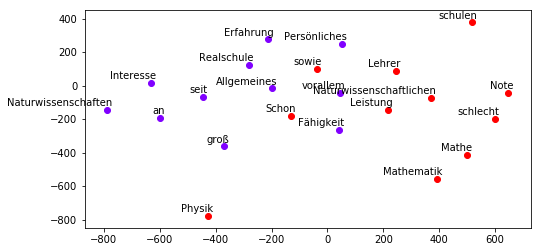

In [18]:
dimred_plot(model, ['Interesse', 'Mathe'], n_sim=10, algo = 'tsne')

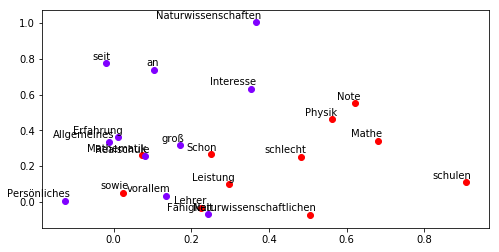

In [19]:
dimred_plot(model, ['Interesse', 'Mathe'], n_sim=10, algo = 'pca')

## Fazit

**Interesse**: Naturwissenschaften, Erfahrung, Fähigkeit, Jugend, Technik

Aus dieser Ähnlichkeitsverteilung lässt sich schließen, dass viele Studierende ihr Fach aus Interesse an der Thematik gewählt haben (auch sichtbar in der Umfrage: fachliches Interesse bei Wahl sehr wichtig). Auch spielen Erfahrungen und Fähigkeiten im betreffenden Bereich eine wichtige Rolle. Zudem scheinen viele bereits als Jugendliche ihr Interesse entwickelt zu haben.

**Schulen**: MINT-Fächer, besonders, schlecht, Note, Lehrer, Unterricht, Problem

Diese Verteilung zeigt, dass die Schule eine tragende Rolle bei der Studienwahl einnimmt. Dabei sind die Noten in den MINT-Fächern für viele ausschlaggebend, ob sie ein Fach in diesem Bereich studieren möchten. Die Noten scheinen entweder besonders gut oder schlecht zu sein. Die Lehrer und deren Unterricht spielen ebenfalls eine wichtige Rolle, da sie den Schülern den Lernstoff vermitteln sollen. Anhand der Ähnlichkeiten zu urteilen scheint es bei MINT-Fächern oft Probleme zu geben. Diese beziehen sich vermutlich auf den Unterricht bzw. die Lehrer.

**Fach**: Note, Unterricht, Leistung

Hier bestätigt sich die Erkenntnis, dass Noten bzw. die Leisung und der Unterricht in den Schulfächern ausschlaggebend bei der Wahl des Studiengangs ist. Viele Studenten scheinen den Studiengang aufgrund ihrer guten Noten in bestimmten Fächern gewählt oder wegen schlechter Noten ausgeschlossen zu haben.

**Berufsaussichten**: Erfahrung, Praktikum, Zukunftsaussichten

Die Berufsaussichten in der Branche ist für viele Studenten ein entscheidender Faktor. In der Umfrage hat sich bereits ergeben, dass dies nach dem Fachinteresse der zweit wichtigste Faktor ist. Auch scheinen einige Studenten bereits Praktika absolviert oder andere Erfahrungen in ihrem zukünftigen Tätigkeitsbereich gesammelt zu haben. Durch die Einsicht in den Berufsalltag haben sie sich möglicherweise für den entsprechenden Studiengang entschieden oder sich in ihrer Entscheidung bestärkt gefühlt.

**Mathe**: schlecht, Leistung, Note, Problem, Physik, Bio

Mathe ist schon seit längerer Zeit bei vielen Schülern ein Problemfach. Dies scheint auch bei einigen der Befragten zuzutreffen. Da Mathematik in vielen MINT-Fächern die Grundlage bildet oder zu großen Teilen im Lehrplan vorgesehen ist, könnten schlechte Noten in diesem Fach davon abschrecken in diesem Bereich zu studieren. Ähnlich scheint es sich auch bei anderen MINT-Fächern wie Physik und Biologie zu verhalten.

**Erwägung**: Betracht(, ziehen), nie, einmal, bewusst, Lehramt

Die Häufigkeit des Worts "Erwägung" ist besonders interessant, da sie zeigt, dass in einigen Fällen durchaus Interesse an einem MINT-Fach besteht aber aus unterschiedlichen Gründen dieses nicht gewählt wird. Im Gegensatz dazu gibt es auch einige die es nie in erwägung gezogen oder sich bewusst dagegen entschieden haben. Die Häufigkeit von "Lehramt" lässt vermuten, dass nicht MINT-Studenten wohl eher in diesem Bereich Lehramt studiert hätten, als ein reines MINT-Fach.

**Ausbildung**: enden, abbrechen, absolvieren, Studieren

Diese Ähnlichkeitsverteilung zeigt, dass es viele Studenten gibt, die eine Ausbildung beendet oder abgebrochen haben, bevor sie angefangen haben zu studieren. Dadurch haben sie bereits Praxiserfahrung und wählen vermutlich dementsprechend einen Studiengang in diesem Bereich. Andererseits könnte der Bereich der Ausbildung ihnen auch nicht zugesagt haben, weshalb die Studenten ein Studium mit einem anderem Themenbereich gewählt haben.

# Word Embeddings zu Verbesserungsvorschlägen

Um die Verbesserungsvorschläge nach dem Clustering genauer zu identifizieren werden nun Word Embeddings auf den geschriebenen Texten gebildet.

## Datenvorbereitung

### Datenimport

In [20]:
import sqlite3
import pandas as pd
import os.path

dbPath = "database/bachelor_umfrage.db"

def get_embeddings_data(table_name="word_embeddings"):
    df = pd.DataFrame()
    if os.path.isfile(dbPath):
        conn = sqlite3.connect(dbPath)
        sql = "SELECT * FROM " + table_name
        sql += " WHERE Verbesserungsvorschläge IS NOT NULL"
        df = pd.read_sql_query(sql, conn)
    else:
        print("Datenbank oder Tabelle konnte nicht gefunden werden.")
    return df

suggestion_df = get_embeddings_data(table_name="word_embeddings")
suggestion_df.sample(2)

,AntwortID,Geschlecht,Studiengang,MINTFach,Qualifikation,GeborenAusland,ElternAusland,GeborenDeutschland,MINTStudiumEltern,StudiumEltern,MINTStudiumGeschwister,StudiumGeschwister,Studienpionier,MINTBerufEltern,MINTBerufGeschwister,...,Biologie,EntscheidungZeitpunkt,Fachinteresse,Berufsaussichten,Gehalt,AnsehenGesellschaft,FamiliaereGründe,Partner,Kinder,Karriere,MINTGründe,NichtMINTGründe,Verbesserungsvorschläge,Eigenschaften,Gründe
323,62791963,Weiblich,Design,nein,allgemeine Hochschulreife,None,1,None,None,1,None,None,None,None,None,...,2,Letztes Jahr,4,3,2,2,1,3,3,3,None,Das Interesse und Verständnis für diesen Bereich war nicht vorhanden.,"Anwendungsbezogene Beispiele, Vorträge aus erster Hand -&gt; 'ein Leben nach dem MINT-Studium'","Weiblich, Design, allgemeine Hochschulreife, Eltern im Ausland geboren, Elternteil hat studiert, kein MINT-Beruf, Beliebtheit Mathematik: 1, Beliebtheit Physik: 1, Beliebtheit Informatik: 2, Beliebtheit Chemie: 1, Beliebtheit Biologie: 2, Fachinteresse: 4, Berufsaussichten: 3, Gehalt: 2, Gesellschaftliches Ansehen: 2, Partner: 3, Kinder: 3, Karriere: 3",Das Interesse und Verständnis für diesen Bereich war nicht vorhanden.
110,62543430,Weiblich,Architektur,nein,fachgebundene Hochschulreife,None,None,1,None,1,None,None,None,1,None,...,2,In der Schule,4,2,2,3,1,4,4,4,None,Das sind alles Fächer die mir nicht liegen und mir auch keinen Spaß machen.,"Bessere Berufschancen, mehr Angebote die auf Frauen zugeschnitten sind.","Weiblich, Architektur, fachgebundene Hochschulreife, in Deutschland geboren, Elternteil hat studiert, Elternteil übt MINT-Beruf aus, Beliebtheit Mathematik: 1, Beliebtheit Physik: 1, Beliebtheit Informatik: 3, Beliebtheit Chemie: 2, Beliebtheit Biologie: 2, Fachinteresse: 4, Berufsaussichten: 2, Gehalt: 2, Gesellschaftliches Ansehen: 3, Partner: 4, Kinder: 4, Karriere: 4",Das sind alles Fächer die mir nicht liegen und mir auch keinen Spaß machen.


### Datenaufbereitung

Es erfolgt die Datenaufbereitung mit Lemmatisierung und POS-Tagging (bezogen auf Substantive). Die Ergebnisse werden jeweils als Spalte dem Dataframe hinzugefügt.

In [21]:
import spacy
# progress bar
from tqdm import tqdm_notebook as tqdm

nlp = spacy.load('de')

def nlp_process(df, col):    
    for i, row in df.iterrows():
        
        if(row[col] and len(str(row[col])) < 1000000):
            spacy_doc = nlp(str(row[col]))
            tokens = []
            lemmas = []
            nouns = []

            for token in spacy_doc:
                if token.pos_ in ('NOUN', 'PROPN'):
                    nouns.append(token.lemma_)
                if token.pos_ not in ('PUNCT'):
                    lemmas.append(token.lemma_)
                    tokens.append(token.text)

            df.at[i, "tokens"] = " ".join(tokens)                
            df.at[i, "lemmas"] = " ".join(lemmas)                
            df.at[i, "nouns"] = " ".join(nouns)
            df.at[i, "no_tokens"] = len(lemmas)

In [22]:
nlp_process(suggestion_df, 'Verbesserungsvorschläge')

In [23]:
suggestion_df[['Verbesserungsvorschläge', 'lemmas', 'nouns']].sample(2)

,Verbesserungsvorschläge,lemmas,nouns
156,nein,nein,
21,"Schwierig,, Man müsste die Anforderungen runter Schrauben, da an den Schule auch das Leistungspensum in den Fächern weniger wird und damit die Studienanfänger teilweise mit dem Einstieg ins Studium Schwierigkeiten haben, weil Stoff vorausgesetzt wird den Sie an Ihrer Schule nicht hatten (Teilweise unterschiedliche Lehrpläne bei gleicher Schulart). Möglich wäre es Vorkurse anzubieten oder wie gesagt Inhalte kürzen., Aber ob das Sinnvoll ist die Qualität und den Umfang eines Studiengang zu reduzieren um mehr Absolventen zu kriegen?, Des Weiteren kann man nicht erwarten wenn Leute nicht ein gewisses technisches Interesse haben, in einen technischen Studiengang zu bringen. Außerdem gibt es neben dem Studium auch noch andere Institutionen, Fachschulen und Ausbildungsberufe in denen es möglich ist, einen MINT-Beruf zu erlernen und auszuüben (Informatiker-Fachschule in Straubing, Chemie-Fachschule in München, ...), , Aber genug der schwarz Malerei, einen produktiven Vorschlag hab ich eventuell auch. Vielen Studienanfängern ist mittlerweile Praxisbezug wichtiger wie die theoretische Lehre. Einige Studierende auch aus anderen Fakultäten und Hochschulen, entscheiden sich aufgrund dem hohen Praxisangebot (Praktikum, Praxissemester,...) bevorzugt für Hochschulen die dies anbieten. Mittlerweile ist auch ab und an zu Beobachten das Universitätsanfänger auf Hochschulen wechsel, auf Grund der zu theoretischen Auslegung von Universitäten. Und ab und an auch einfach weil die Anforderungen Ihnen dort zu hoch sind, siehe oben ,-) , , Viel Erfolg bei deiner BA, hoffe du erhältst die entsprechende Resonanz, die du erhoffst.",Schwierig Man müsste der Anforderung runter Schraube da an der schulen auch der Leistungspensum in der Fach wenig werden und damit der Studienanfänger teilweise mit der Einstieg ins Studium Schwierigkeit haben weil Stoff voraussetzen werden der ich an sich schulen nicht haben teilweis unterschiedlich Lehrplan bei gleich Schulart Möglich sein ich Vorkurse anbieten oder wie sagen Inhalt kürzen aber ob der Sinnvoll sein der Qualität und der Umfang ein Studiengang zu reduzieren um mehr Absolventen zu kriegen der Weitere können man nicht erwarten wenn Leute nicht einen gewiß technisch Interesse haben in ein technisch Studiengang zu bringen Außerdem geben ich neben der Studium auch noch ander Institution Fachschule und Ausbildungsberufe in der ich möglich sein ein MINT-Beruf zu erlernen und ausüben Informatiker-Fachschule in Straubing Chemie-Fachschule in München aber genug der schwarz Malerei ein produktiv Vorschlag hab ich eventuell auch viel Studienanfängern sein mittlerweile Praxisbezug wichtig wie der theoretische lehren einigen Studierende auch aus ander Fakultät und Hochschule entscheiden sich aufgrund der hoch Praxisangebot Praktikum Praxissemester bevorzugen für Hochschule der dies anbieten Mittlerweile sein auch ab und an zu Beobachten der Universitätsanfänger auf Hochschule wechsel auf Grund der zu theoretisch Auslegung von Universität und ab und an auch einfach weil der Anforderung ich dort zu hoch sein siehe oben viel erfolgen bei sich BA hoffen du erhalten der entsprechend Resonanz der du erhoffen,Anforderung Schraube schulen Leistungspensum Fach Studienanfänger Einstieg Studium Schwierigkeit Stoff schulen Lehrplan Schulart Vorkurse Inhalt Sinnvoll Qualität Umfang Studiengang Absolventen Weitere Leute Interesse Studiengang Studium Institution Fachschule Ausbildungsberufe MINT-Beruf Informatiker-Fachschule Straubing Chemie-Fachschule München Malerei Vorschlag Studienanfängern Praxisbezug lehren Studierende Fakultät Hochschule Praxisangebot Praktikum Praxissemester Hochschule Beobachten Universitätsanfänger Hochschule Grund Auslegung Universität Anforderung erfolgen BA Resonanz


## Training der Word Embeddings

Verewendung der Word2Vec Implementierung in Gensim um das Modell zu Trainieren.

In [24]:
import gensim

# defaults
# window: windows size
# sg=0: to use skipgram set sg=1
# hs=0: use hierarchical softmax for faster training of large datasets
# negative=5: number of negative samples
# min_count=2: minimal word count
# sample=0.001: downsampling of frequent words
# iter=5: number of epochs
model2 = gensim.models.Word2Vec(suggestion_df['lemmas'].str.split(), size=50, window=5, sg=1, negative=5, 
                               min_count=2, workers=4, iter=25)

Speichern des Modells

In [25]:
model2.save('word2vec_suggestion_model.bin')

Laden des Modells

In [28]:
#model = gensim.models.Word2Vec.load('word2vec_suggestion_model.bin')

## Similarity-Queries

Im folgenden werden zunächst die Wörter betrachtet, welche beim Clustering besonders häufig vorkamen. Dabei wird versucht durch die Word Embeddings eine genauere Vorstellung der Entscheidungsgründe zu bekommen. Die Wörter waren folgende:
- Schulen
- Interesse
- Fach
- Praxisbezug
- Mathe (und andere Schulfächer)
- Vorlesung

In [26]:
model2.wv.most_similar('schulen', topn=20)

[('sollen', 0.9431),
 ('bereits', 0.9360),
 ('in', 0.9326),
 ('Lehrer', 0.9101),
 ('In', 0.9014),
 ('gestalten', 0.8841),
 ('werden', 0.8765),
 ('MINT-Fächer', 0.8764),
 ('schon', 0.8755),
 ('Unterricht', 0.8612),
 ('beginnen', 0.8563),
 ('Mädchen', 0.8504),
 ('Kind', 0.8439),
 ('aufhören', 0.8333),
 ('oft', 0.8201),
 ('unterrichten', 0.8182),
 ('gut', 0.8151),
 ('Schüler', 0.8146),
 ('Fach', 0.8044),
 ('praktisch', 0.8031)]

In [27]:
model2.wv.most_similar('Interesse', topn=20)

[('wecken', 0.9202),
 ('Kind', 0.8997),
 ('Schüler', 0.8501),
 ('im', 0.8499),
 ('dafür', 0.8494),
 ('Mittelschulen', 0.8486),
 ('müssen', 0.8447),
 ('früh', 0.8446),
 ('schaffen', 0.8437),
 ('beginnen', 0.8418),
 ('Realschulen', 0.8413),
 ('der', 0.8392),
 ('Schon', 0.8361),
 ('damals', 0.8338),
 ('Erfahrung', 0.8335),
 ('Lehrer', 0.8315),
 ('MINT-Fächern', 0.8295),
 ('offen', 0.8287),
 ('tagen', 0.8265),
 ('nutzen', 0.8261)]

In [28]:
model2.wv.most_similar('Fach', topn=20)

[('müssen', 0.9265),
 ('Werbung', 0.9220),
 ('beginnen', 0.9203),
 ('Gerade', 0.9171),
 ('aufhören', 0.9157),
 ('Schüler', 0.9127),
 ('gerade', 0.9125),
 ('gegen', 0.9110),
 ('unterrichten', 0.9096),
 ('Lehrer', 0.9070),
 ('Zudem', 0.9064),
 ('Schon', 0.9060),
 ('Stärken', 0.9048),
 ('offen', 0.9019),
 ('oft', 0.9017),
 ('verdeutlichen', 0.9015),
 ('praxisnäher', 0.9004),
 ('verbessern', 0.9002),
 ('Kind', 0.8970),
 ('Grundschule', 0.8967)]

In [29]:
model2.wv.most_similar('Praxisbezug', topn=20)

[('mehr', 0.9698),
 ('Projekt', 0.9666),
 ('wenig', 0.9662),
 ('Forschung', 0.9662),
 ('&', 0.9629),
 ('Industrie', 0.9627),
 ('Zusammenarbeit', 0.9621),
 ('herstellen', 0.9607),
 ('Experiment', 0.9593),
 ('Lust', 0.9590),
 ('Fokus', 0.9584),
 ('fördern', 0.9567),
 ('Aufklärung', 0.9565),
 ('amp', 0.9560),
 ('etc.', 0.9556),
 ('Lehrplan', 0.9551),
 ('Praktikum', 0.9545),
 ('Bezug', 0.9532),
 ('praktische', 0.9529),
 ('Workshop', 0.9523)]

In [30]:
model2.wv.most_similar('Mathe', topn=20)

[('Physik', 0.9465),
 ('Chemie', 0.9146),
 ('Biologie', 0.9068),
 ('und', 0.9055),
 ('spielerisch', 0.8944),
 ('Schulzeit', 0.8915),
 ('greifbar', 0.8915),
 ('etc', 0.8903),
 ('während', 0.8811),
 ('wieder', 0.8799),
 ('unterrichten', 0.8783),
 ('--&gt', 0.8773),
 ('stark', 0.8717),
 ('Gerade', 0.8675),
 ('oftmals', 0.8654),
 ('vorallem', 0.8644),
 ('insbesondere', 0.8643),
 ('relevant', 0.8632),
 ('gerade', 0.8632),
 ('Diese', 0.8618)]

In [31]:
model2.wv.most_similar('Vorlesung', topn=20)

[('passen', 0.9982),
 ('komplex', 0.9973),
 ('Protokoll', 0.9971),
 ('MINT-Fach', 0.9970),
 ('Realität', 0.9969),
 ('fangen', 0.9968),
 ('blicken', 0.9967),
 ('Themengebiet', 0.9965),
 ('fehlen', 0.9965),
 ('Einstieg', 0.9963),
 ('trocken', 0.9963),
 ('MINT-Studiengängen', 0.9963),
 ('Information', 0.9963),
 ('Fachschaft', 0.9963),
 ('schreiben', 0.9963),
 ('Hier', 0.9963),
 ('Kenntnisstand', 0.9962),
 ('FWPF', 0.9962),
 ('Förderung', 0.9962),
 ('berichten', 0.9962)]

## Visualisierung

Um die Word Embeddings grafisch darzustellen werden diese nun mit PCA und tSNE visualisiert.

In [32]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

def dimred_plot(model, words, n_sim = 1, algo = 'tsne'):
    "Creates and TSNE model and plots it"
    wv = []
    sim_words = set()

    if n_sim > 0:
        for word in words:
            sim_words.add((word, word))
            for sim_word, score in model.wv.most_similar(word, topn=n_sim):
                sim_words.add((word, sim_word))
    sim_words = list(sim_words)

    if algo == 'tsne':
        dimred_model = TSNE(perplexity=10, n_components=2, init='random', n_iter=1000, random_state=37)
    elif algo == 'pca':
        dimred_model = PCA(n_components=2, random_state=None)
    else:
        return
    
    for (_, sim_word) in sim_words:
        wv.append(model[sim_word])
    
    if algo == 'tsne':
        wv2d = dimred_model.fit_transform(wv)
    else:
        dimred_model.fit(model.syn1neg)
        wv2d = dimred_model.transform(wv)

    x = wv2d[:, 0]
    y = wv2d[:, 1]
        
    plt.figure(figsize=(8, 4)) 
    # assign a color to each input word
    cluster_colors = cm.rainbow(np.linspace(0, 1, len(words)))

    # plt.scatter(x, y)
    for i, (word, sim_word) in enumerate(sim_words):
        plt.scatter(x[i],y[i], c=[cluster_colors[words.index(word)]])
        plt.annotate(sim_word,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

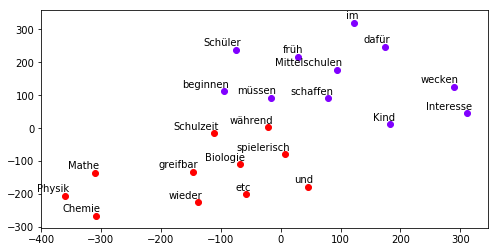

In [33]:
dimred_plot(model2, ['Interesse', 'Mathe'], n_sim=10, algo = 'tsne')

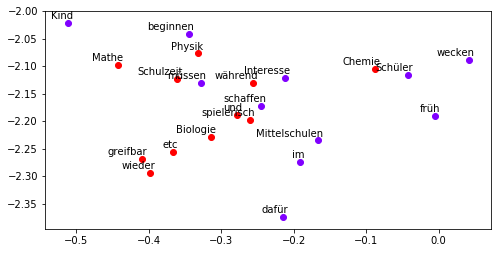

In [34]:
dimred_plot(model2, ['Interesse', 'Mathe'], n_sim=10, algo = 'pca')

## Fazit

**Schulen**: Lehrer, Unterricht, Mädchen, praktisch

Wie bereits bei den vorherigen Word Embeddings festgestellt, ist die Schule mit ihren Lehrern und deren Unterricht ein entscheidender Faktor bei der Wahl des Studiengangs. Daher lässt sich aus dieser Ähnlichkeitsverteilung ablesen, dass der Unterricht praktischer gestaltet werden sollte. Auch sollten Mädchen mehr an MINT-Fächer (da die Frage danach war) herangeführt werden.

**Interesse**: wecken, Schüler, Mittelschulen, früh, Realschulen

Da Fachinteresse eine wichtige Rolle bei der Studienwahl spielt sollte dieses auch früh geweckt werden. Dieser Auftrag geht dabei an die Schulen, da sie viel Einfluss auf die Kinder und Jugendlichen ausüben können.

**Fach**: Werbung, praxisnäher, verbessern, Grundschule

Das Wort Fach ist hier sowohl im Bezug auf das Schulfach als auch das Fachgebiet eines Studiengangs zu betrachten. Werbung zu machen ist für die Hochschulen wichtig, um die Aufmerksamkeit der Schüler zu wecken. Auch sollten sowohl Schul- als auch Studienfächer praxisnäher gestaltet werden um attraktiver zu werden. Aufgrund der Häufigkeit des Wortes Grundschule lässt sich darauf schließen, dass die Schüler möglichst früh an die MINT-Fächer herangeführt werden sollten.

**Praxisbezug**: mehr, Projekt, Forschung, Industrie (, Zusammenarbeit), Experiment, Praktikum

Ein wichtiger Faktor um Interesse zu wecken und beizubehalten scheint der Praxisbezug zu sein. Dieser sollte sowohl im Schulunterricht als auch in den Vorlesungen vermehrt hergestellt werden. Dazu wird vorgeschlagen mehr Projekte, Experimente und Praktiken einzubinden, möglicherweise in Zusammenarbeit mit der Industrie. Auch das Vorstellen der aktuellen Forschung im Fachgebiet könnte weiteres Interesse wecken und zeigen, was in diesem Bereich erreicht werden kann.

**Mathe**: Physik, Chemie, Biologie, spielerisch, greifbar

Wie bereits festgestellt handelt es sich besonders bei Mathe aber auch bei andern MINT-Fächern wie Physik, Chemie und Biologie oft um Problemfächer. Diese sollten z.B. durch mehr Praxisbezug greifbarer gemacht werden und wenn möglich spielerisch vermittelt werden. Dadurch könnten die Schüler mehr Spaß daran haben und ihre Noten sich verbessern, wodurch wiederum das Interesse steigen kann.

**Vorlesung**: passen, komplex, Einstieg, trocken, Kentnisstand

Nachdem sich die Studenten für MINT-Fächer eingeschrieben haben, müssen sie dieses Studium jedoch auch fortsetzen wollen. Dabei spielen die Vorlesungen eine zentrale Rolle. Diese scheinen je nach persönlicher Präferenz ok oder zu komplex und zu trocken zu sein. Dabei scheint gerade der Einstieg in den ersten Semestern einigen Studenten Probleme zu bereiten und sollte daher erleichtert werden. Vor allem sollte auf den unterschiedlichen Kentnisstand der Erstsemester geachtet werden. Diese haben teilweise bereits abgeschlossene Ausbildungen und dadurch Fachwissen oder "nur" ein Abitur.